# Regression

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib notebook

Real f(x): x*1.5 + -0.5 + e
Estimated f(x): x*1.4 + -0.5 + e


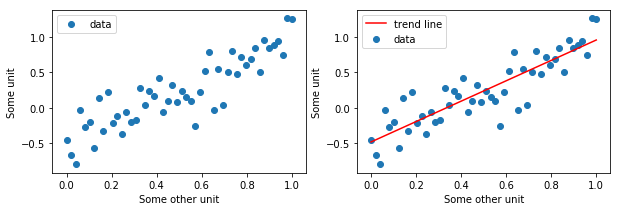

In [2]:
X = np.linspace(0, 1, 50)
def f(v):
    return (v*1.5 - .5) + np.random.normal(0, .2, size=v.shape)
Y = f(X)

fig = plt.figure(figsize=(10, 3))
ax = fig.subplots(1, 2)

ax[0].scatter(X, Y, label="data")
ax[0].set_ylabel("Some unit")
ax[0].set_xlabel("Some other unit")
ax[0].legend()

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

ax[1].scatter(X, Y, label="data")
ax[1].plot(X, X*slope + intercept, c='red', label="trend line")
ax[1].set_ylabel("Some unit")
ax[1].set_xlabel("Some other unit")
ax[1].legend()


print("Real f(x): x*%.1f + %.1f + e" % (1.5, -.5))
print("Estimated f(x): x*%.1f + %.1f + e" % (slope, intercept))


In [ ]:
n_samples = 30
n_variables = 2
X = np.zeros((n_samples, n_variables))
X[:, 0] = np.random.randint(0, 2, size=n_samples)
X

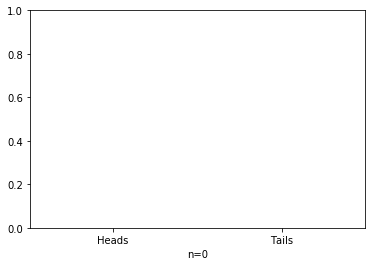

fps: 19.8


In [3]:
n_samples = 100
n_outcomes = 2

import time

fps = 20
fig, ax = plt.subplots()
ax.set_ylim((0, 1))
title = plt.xlabel("n=%i" % 0)
if n_outcomes == 2:
    labels = ['Heads', 'Tails']
else:
    labels = ["Side %i" % (i+1) for i in range(n_outcomes)]
h = ax.bar(labels, np.zeros(n_outcomes), align='center')#, color=plt.get_cmap('Pastel1'))

outcomes = np.zeros(n_outcomes)

plt.show(block=False)

T = time.time()
for n in range(n_samples):
    t = time.time()
    outcomes[np.random.randint(n_outcomes)] += 1

    title.set_text("n=%i" % (n+1))
    for i in range(n_outcomes):
        h[i].set_height(outcomes[i]/np.sum(outcomes))

    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(max(0, t+1/fps-time.time()))

print("fps: %.1f" % (n_samples/(time.time()-T)))


In [ ]:
%matplotlib notebook
import time
from matplotlib import pyplot as plt
import numpy as np

def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(x,x)
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    fig.canvas.draw()   # note that the first draw comes before setting data 

    h1 = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")

    h2, = ax2.plot(x, lw=3)
    text = ax2.text(0.8,1.5, "")
    ax2.set_ylim([-1,1])


    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    t_start = time.time()
    k=0.
    for i in np.arange(1000):
        h1.set_data(np.sin(X/3.+k)*np.cos(Y/3.+k))
        h2.set_ydata(np.sin(x/3.+k))
        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) ) 
        text.set_text(tx)
        #print tx
        k+=0.11
        if blit:
            # restore background
            fig.canvas.restore_region(axbackground)
            fig.canvas.restore_region(ax2background)

            # redraw just the points
            ax1.draw_artist(h1)
            ax2.draw_artist(h2)

            # fill in the axes rectangle
            fig.canvas.blit(ax1.bbox)
            fig.canvas.blit(ax2.bbox)
            # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            # it is mentionned that blit causes strong memory leakage. 
            # however, I did not observe that.

        else:
            # redraw everything
            fig.canvas.draw()
            fig.canvas.flush_events()


        plt.pause(0.000000000001) 
        #plt.pause calls canvas.draw(), as can be read here:
        #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
        #however with Qt4 (and TkAgg??) this is needed. It seems,using a different backend, 
        #one can avoid plt.pause() and gain even more speed.


#live_update_demo(True) # 28 fps
live_update_demo(False) # 18 fps

In [ ]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.randn(100))

tstart = time.time()
num_plots = 0
while time.time()-tstart < 1:
    line.set_ydata(np.random.randn(100))
    fig.canvas.draw()
    fig.canvas.flush_events()
    num_plots += 1
print(num_plots)

In [41]:
import matplotlib
matplotlib.get_backend()

'nbAgg'